# Quantum 3-wave instability

Authors of paper: Michael May, Hong Qin @ Princeton

Notebook: Óscar Amaro (Mar 2024)

Link to paper: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.107.062204

Data retrieved from pre-print using: WebPlotDigitizer

__TODO__: figure 5

In [18]:
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, pi, euler_gamma
import pandas as pd
import glob as glob
import h5py
# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from scipy.interpolate import interp1d

# eigenvalues and matrix exponential
from numpy.linalg import eigvalsh
from scipy.linalg import expm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# matrix
def hij(s2,s3):
    d = s2+1
    mat = np.zeros((d,d))
    for i in range(s2):
        mat[i,i+1] = sqrt( (s2-i)*(s3-s2+1+i)*(i+1) )
    mat = mat + np.transpose(mat)
    return mat
#hij(3,3)

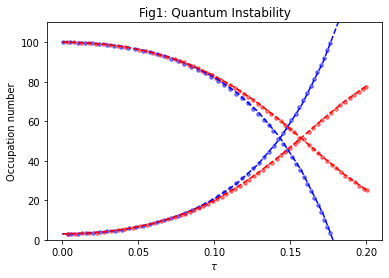

In [32]:
# figure 1

### data from paper
f = open('dataWPD/fig1/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
plt.plot(x,y, '.b', markersize=7, alpha=0.5)
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
plt.plot(x,y, '.r', markersize=7, alpha=0.5)


### linear analytical solution
# parameters as described in caption
n1i, n2i, n3i = 100, 10, 3
eps = 0.1;
d10 = 0.02040608101214162;
d1 = d10;
C1 = -3.9;
#
# aux constants
gQ = 2*sqrt(n1i-n2i-n3i-1/2);
BQ = 2*n1i*(1+n2i+n3i)-2*n2i*n3i-7*d1;
#
def eq51(tau):
    return BQ/gQ**2 + C1*exp(gQ*tau) - (BQ/gQ**2 + C1)*exp(-gQ*tau)
taulst = np.linspace(0,0.2,15)
plt.plot(taulst, n3i-eq51(taulst), 'b--')
plt.plot(taulst, n1i+eq51(taulst), 'b--')


### numerical solution to the Hamiltonian system
s2 = n1i + n3i
s3 = n1i + n2i
H = hij(s2,s3) # Hamiltonian fixed for (s2,s3)
#
psi0 = np.zeros(s2+1) # initial state
#psi0[n3i] = 1
# build initial state as described in eq 43
for i in range(s2+1):
    psi0[i] = eps**(np.abs(i-n3i))
# normalize initial state
psi0 = psi0 / np.sqrt(np.sum( np.abs(psi0)**2 ))
# build unitary
n1avg = np.zeros(len(taulst))
for i in range(len(taulst)):
    tau = taulst[i]
    # unitary
    U = expm(-1j*H*tau)
    # evolved state
    psi = np.matmul(U,psi0)
    # state amplitude index list
    jlst = np.arange(0,s2+1,1)
    # save occupation number
    n1avg[i] = np.sum( np.abs(psi)**2 * (s2-jlst) )    
plt.plot(taulst, n1avg, 'r--')
plt.plot(taulst, n3i+(n1i-n1avg), 'r--')

plt.xticks([0,0.05,0.1,0.15,0.2])
plt.ylim([0,110])
plt.xlabel(r'$\tau$')
plt.ylabel(r'Occupation number')
plt.title(r'Fig1: Quantum Instability')
plt.show()

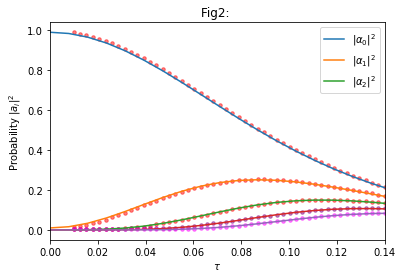

In [41]:
# figure 2
mrkrsz = 7
tau = np.linspace(0.01,0.14,50) 

f = open('dataWPD/fig2/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
#indxs = indxs[( (x >= tau[0]) * (x <= tau[-1])) ]
#x = x[indxs]; y = y[indxs]
f = interp1d(x, y)
a0_x, a0_y = tau, f(tau)
plt.plot(a0_x, a0_y, '.r', markersize=mrkrsz, alpha=0.5)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
f = interp1d(x, y)
a1_x, a1_y = tau, f(tau)
plt.plot(a1_x, a1_y, '.r', markersize=mrkrsz, alpha=0.5)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
f = interp1d(x, y)
a2_x, a2_y = tau, f(tau)
plt.plot(a2_x, a2_y, '.r', markersize=mrkrsz, alpha=0.5)
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
f = interp1d(x, y)
a3_x, a3_y = tau, f(tau)
plt.plot(a3_x, a3_y, '.', markersize=mrkrsz, alpha=0.5, color='purple')
#
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
f = interp1d(x, y)
a4_x, a4_y = tau, f(tau)
plt.plot(a4_x, a4_y, '.', markersize=mrkrsz, alpha=0.5, color='magenta')

# testing if "total/summed" probabilities add to 1 always
#plt.plot(a4_x, (a0_y+a1_y+a2_y+a3_y+a4_y), 'k--', alpha=0.5, label=r'$\Sigma_{i=0}^{4}|a_i|^2$')
"""
# testing sqrt of probabilities
plt.plot(a0_x, sqrt(a0_y), '.r', markersize=3, alpha=0.5)
plt.plot(a1_x, sqrt(a1_y), '.r', markersize=3, alpha=0.5)
plt.plot(a2_x, sqrt(a2_y), '.r', markersize=3, alpha=0.5)
plt.plot(a3_x, sqrt(a3_y), '.', markersize=3, alpha=0.5, color='purple')
plt.plot(a4_x, sqrt(a4_y), '.', markersize=3, alpha=0.5, color='magenta')
plt.xticks(np.arange(0,0.14,0.02))
plt.xlabel(r'$\tau$')
plt.ylabel(r'Sqrt probability $|a_i|$')
plt.show()
"""

### numerical solution to the Hamiltonian system
n1i, n2i, n3i = 100, 0, 0
s2 = n1i + n3i
s3 = n1i + n2i
H = hij(s2,s3) # Hamiltonian fixed for (s2,s3)
taulst = np.linspace(0, 0.15, 20)
#
psi0 = np.zeros(s2+1) # initial state
#psi0[n3i] = 1
# build initial state as described in eq 43
for i in range(s2+1):
    psi0[i] = eps**(np.abs(i-n3i))
# normalize initial state
psi0 = psi0 / np.sqrt(np.sum( np.abs(psi0)**2 ))
# build unitary
a0lst = np.zeros_like(taulst)
a1lst = np.zeros_like(taulst)
a2lst = np.zeros_like(taulst)
a3lst = np.zeros_like(taulst)
a4lst = np.zeros_like(taulst)
for i in range(len(taulst)):
    tau = taulst[i]
    # unitary
    U = expm(-1j*H*tau)
    # evolved state
    psi = np.matmul(U,psi0)
    # state amplitude index list
    jlst = np.arange(0,s2+1,1)
    # save probability of occupation numbers
    a0lst[i] = np.abs(psi[0])**2
    a1lst[i] = np.abs(psi[1])**2
    a2lst[i] = np.abs(psi[2])**2
    a3lst[i] = np.abs(psi[3])**2
    a4lst[i] = np.abs(psi[4])**2
plt.plot(taulst, a0lst, '-', label=r'$|\alpha_0|^2$')
plt.plot(taulst, a1lst, '-', label=r'$|\alpha_1|^2$')
plt.plot(taulst, a2lst, '-', label=r'$|\alpha_2|^2$')
plt.plot(taulst, a3lst, '-')
plt.plot(taulst, a4lst, '-')


plt.xticks(np.arange(0,0.14,0.02))
plt.xlim([0,0.14])
plt.xlabel(r'$\tau$')
plt.ylabel(r'Probability $|a_i|^2$')
plt.title(r'Fig2: ')
plt.legend()
plt.show()

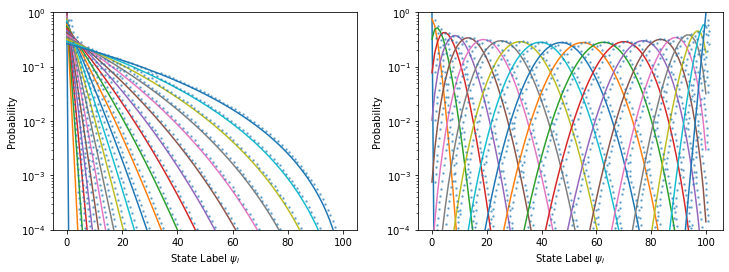

In [73]:
# figure 3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))


### numerical solution to the Hamiltonian system - a
taulst = np.linspace(0, 0.2, 21) # time
eps = 1e-6
n1i, n2i, n3i = 100, 0, 0
s2 = n1i + n3i
s3 = n1i + n2i
H = hij(s2,s3) # Hamiltonian fixed for (s2,s3)
#
psi0 = np.zeros(s2+1) # initial state
#psi0[n3i] = 1
# build initial state as described in eq 43
for i in range(s2+1):
    psi0[i] = eps**(np.abs(i-n3i))
# normalize initial state
psi0 = psi0 / np.sqrt(np.sum( np.abs(psi0)**2 ))
# state amplitude index list
ilst = np.arange(0,s2+1,1)
# distributions
psilst = np.zeros((len(taulst),len(ilst)))
for i in range(len(taulst)):
    tau = taulst[i]
    # unitary
    U = expm(-1j*H*tau)
    # evolved state
    psi = np.matmul(U,psi0)
    psi = psi / np.sqrt(np.sum( np.abs(psi)**2 ))
    # save probability distribution
    psilst[i,:] = np.abs(psi)
    axes[0].plot(ilst, psilst[i,:], '-')

# plot data - a
f = open('dataWPD/fig3a/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
axes[0].plot(x,y, '.', markersize=3, alpha=0.5, color='tab:blue')



### numerical solution to the Hamiltonian system - b
taulst = np.linspace(0, 0.05, 21) # time
eps = 1e-6
n1i, n2i, n3i = 100, 900, 0
s2 = n1i + n3i
s3 = n1i + n2i
H = hij(s2,s3) # Hamiltonian fixed for (s2,s3)
#
psi0 = np.zeros(s2+1) # initial state
#psi0[n3i] = 1
# build initial state as described in eq 43
for i in range(s2+1):
    psi0[i] = eps**(np.abs(i-n3i))
# normalize initial state
psi0 = psi0 / np.sqrt(np.sum( np.abs(psi0)**2 ))
# state amplitude index list
ilst = np.arange(0,s2+1,1)
# distributions
psilst = np.zeros((len(taulst),len(ilst)))
for i in range(len(taulst)):
    tau = taulst[i]
    # unitary
    U = expm(-1j*H*tau)
    # evolved state
    psi = np.matmul(U,psi0)
    psi = psi / np.sqrt(np.sum( np.abs(psi)**2 ))
    # save probability distribution
    psilst[i,:] = np.abs(psi)
    axes[1].plot(ilst, psilst[i,:], '-')
    
# paper data - b
f = open('dataWPD/fig3b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
axes[1].plot(x,y, '.', markersize=3, alpha=0.5, color='tab:blue')


for i in range(2):
    axes[i].set_yscale('log')
    axes[i].set_xlabel(r'State Label $\psi_i$')
    axes[i].set_ylabel(r'Probability')
    axes[i].set_ylim([1e-4,1])

plt.show()

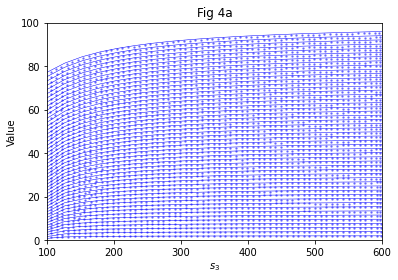

In [75]:
# figure 4a

s2 = 100
s2half = int(s2/2)
s3dim = 20
s3lst = np.linspace(s2,600,s3dim)
eigs4a = np.zeros((s3dim,s2half))
for i in range(s3dim):
    s3 = s3lst[i]
    eigs = eigvalsh(hij(s2,s3))
    #eigs[eigs>0]
    eigs = np.sort( eigs )[s2half+1:]
    eigs4a[i,:] = eigs * 1/sqrt(s3)

for i in range(s2half):
    plt.plot(s3lst, eigs4a[:,i], 'b', linewidth=1/2)
plt.xlim([np.min(s3lst), np.max(s3lst)])
plt.ylim([0, s2])
plt.xlabel(r'$s_3$')
plt.ylabel(r'Value')

# overlay WPD data
f = open('dataWPD/fig4a/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]
y = datatmp2[:,1][indxs]
plt.plot(x,y, '.b', markersize=3, alpha=0.4)

#plt.xticks(np.arange(0,0.14,0.02))
#plt.xlabel(r'$\tau$')
#plt.ylabel(r'Probability')
plt.title(r'Fig 4a')

plt.show()

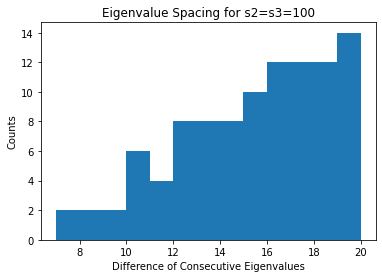

In [65]:
# Figure 4b

# numpy's eigenvalue function
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html#numpy.linalg.eigvalsh
eigs100 = eigvalsh(hij(100,100))
eigs100 = np.sort(eigs100)
eigsdiff = eigs100[1:]-eigs100[:-1]

plt.hist( eigsdiff, np.arange(7,21,1) )
plt.xlabel('Difference of Consecutive Eigenvalues')
plt.ylabel('Counts')
plt.title('Fig4b Eigenvalue Spacing for s2=s3=100')
plt.show()